<a href="https://colab.research.google.com/github/Amaka29/hamoye_quiz_1/blob/main/Cocacola_Financial_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Cocacola Financial **Report**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr
import plotly.express as px

In [2]:
file_path = '/Cocacola Statement of Income - Sheet1.csv'

# Load the data into a pandas DataFrame
income_statement = pd.read_csv(file_path)
income_statement

,Statements Of Income,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Revenues,30990.00,35119.00,46542.00,48017.00,46854.00,45998.00,44294.00,41863.00,35410.00,31856.00,37266.00
1,Cost Of Goods And Services Sold,11088.00,12693.00,18215.00,19053.00,18421.00,17889.00,17482.00,16465.00,13256.00,11770.00,14619.00
2,Gross Profit,19902.00,22426.00,28327.00,28964.00,28433.00,28109.00,26812.00,25398.00,22154.00,20086.00,22647.00
3,"Selling, General And Administrative Expense",11358.00,13158.00,17422.00,17738.00,17310.00,17218.00,16427.00,15262.00,12496.00,10307.00,12103.00
4,"Other Cost And Expense, Operating",313.00,819.00,732.00,447.00,895.00,1183.00,1657.00,1510.00,2157.00,1079.00,458.00
5,Operating Income,8231.00,8449.00,10173.00,10779.00,10228.00,9708.00,8728.00,8626.00,7501.00,8700.00,10086.00
6,Interest Income,249.00,317.00,483.00,471.00,534.00,594.00,613.00,642.00,677.00,682.00,563.00
7,Interest Expense,355.00,733.00,417.00,397.00,463.00,483.00,856.00,733.00,841.00,919.00,946.00
8,Equity Income (Loss) - Net,781.00,1025.00,690.00,819.00,602.00,769.00,489.00,835.00,1071.00,1008.00,1049.00
9,Other Income (Loss) - Net,40.00,5185.00,529.00,137.00,576.00,-1263.00,631.00,-1234.00,-1666.00,-1121.00,34.00


In [3]:
file_path2 = '/Cocacola Balance Sheet - Sheet1.csv'

# Load the data into a pandas DataFrame
balance_sheet = pd.read_csv(file_path2)
balance_sheet

,Balance Sheets,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Cash And Cash Equivalents,7021.0,8517.0,12803.0,8442.0,10414.0,8958.0,7309.0,8555.0,6006.0,8926.0,6480.0
1,Short-Term Investments,2130.0,2682.0,1088.0,5017.0,6707.0,9052.0,8322.0,9595.0,9352.0,2025.0,1467.0
2,"Total Cash, Cash Equivalents And Short-Term In...",9151.0,11199.0,13891.0,13459.0,17121.0,18010.0,15631.0,18150.0,15358.0,10951.0,7947.0
3,Marketable Securities,62.0,138.0,144.0,3092.0,3147.0,3665.0,4269.0,4051.0,5317.0,5013.0,3228.0
4,"Trade Accounts Receivable, Less Allowances",3758.0,4430.0,4920.0,4759.0,4873.0,4466.0,3941.0,3856.0,3667.0,3396.0,3971.0
5,Inventories,2354.0,2650.0,3092.0,3264.0,3277.0,3100.0,2902.0,2675.0,2655.0,2766.0,3379.0
6,Prepaid Expenses And Other Assets,2226.0,3162.0,3450.0,2781.0,2886.0,3066.0,2752.0,2481.0,2000.0,1962.0,1886.0
7,Total Current Assets,17551.0,21579.0,25497.0,30328.0,31304.0,32986.0,33395.0,34010.0,36545.0,30634.0,20411.0
8,Equity Method Investments,6217.0,6954.0,7233.0,9216.0,10393.0,9947.0,12318.0,16260.0,20856.0,19407.0,19025.0
9,Other Investments,538.0,631.0,1141.0,1232.0,1119.0,3678.0,3470.0,989.0,1096.0,867.0,854.0


In [4]:
# Check for missing values
print("\nIncome Statement Missing Values:")
print(income_statement.isnull().sum())

print("\nBalance Sheet Missing Values:")
print(balance_sheet.isnull().sum())


Income Statement Missing Values:
Statements Of Income    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
2017                    0
2018                    0
2019                    0
dtype: int64

Balance Sheet Missing Values:
Balance Sheets     0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
dtype: int64


In [5]:
# Check data types
print("Income Statement Data Types:")
print(income_statement.dtypes)

print("\nBalance Sheet Data Types:")
print(balance_sheet.dtypes)

Income Statement Data Types:
Statements Of Income     object
2009                    float64
2010                    float64
2011                    float64
2012                    float64
2013                    float64
2014                    float64
2015                    float64
2016                    float64
2017                    float64
2018                    float64
2019                    float64
dtype: object

Balance Sheet Data Types:
Balance Sheets      object
2009               float64
2010               float64
2011               float64
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
2017               float64
2018               float64
2019               float64
dtype: object


In [6]:
# Transpose the DataFrame to have years as rows and financial metrics as columns
income_statement = income_statement.T
income_statement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Statements Of Income,Revenues,Cost Of Goods And Services Sold,Gross Profit,"Selling, General And Administrative Expense","Other Cost And Expense, Operating",Operating Income,Interest Income,Interest Expense,Equity Income (Loss) - Net,Other Income (Loss) - Net,Income Before Income Taxes,Income Taxes,Consolidated Net Income,Net Income (Loss) Attributable To Noncontrolli...,Net Income Attributable To Shareowners Of The ...,Basic Net Income Per Share (In Dollars Per Share),Diluted Net Income Per Share (In Dollars Per S...,Average Shares Outstanding (In Shares),Effect Of Dilutive Securities (In Shares),Average Shares Outstanding Assuming Dilution (...
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,8946.0,2040.0,6906.0,82.0,6824.0,2.95,2.93,2314.0,15.0,2329.0
2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,5185.0,14243.0,2384.0,11859.0,50.0,11809.0,5.12,5.06,2308.0,25.0,2333.0
2011,46542.0,18215.0,28327.0,17422.0,732.0,10173.0,483.0,417.0,690.0,529.0,11458.0,2812.0,8646.0,62.0,8584.0,1.88,1.85,4568.0,78.0,4646.0
2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,137.0,11809.0,2723.0,9086.0,67.0,9019.0,2.0,1.97,4504.0,80.0,4584.0
2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.9,4434.0,75.0,4509.0
2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.6,4387.0,63.0,4450.0
2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,631.0,9605.0,2239.0,7366.0,15.0,7351.0,1.69,1.67,4352.0,53.0,4405.0
2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,-1234.0,8136.0,1586.0,6550.0,23.0,6527.0,1.51,1.49,4317.0,50.0,4367.0
2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,-1666.0,6742.0,5560.0,101.0,35.0,1248.0,0.29,0.29,4272.0,52.0,4324.0


In [7]:
# Transpose the DataFrame to have years as rows and financial metrics as columns
balance_sheet = balance_sheet.T
balance_sheet

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Balance Sheets,Cash And Cash Equivalents,Short-Term Investments,"Total Cash, Cash Equivalents And Short-Term In...",Marketable Securities,"Trade Accounts Receivable, Less Allowances",Inventories,Prepaid Expenses And Other Assets,Total Current Assets,Equity Method Investments,Other Investments,...,Deferred Income Taxes,Common Stock,Capital Surplus,Reinvested Earnings,Accumulated Other Comprehensive Income (Loss),Treasury Stock,Equity Attributable To Shareowners,Equity Attributable To Noncontrolling Interests,Total Equity,Total Liabilities And Equity
2009,7021.0,2130.0,9151.0,62.0,3758.0,2354.0,2226.0,17551.0,6217.0,538.0,...,1580.0,880.0,8537.0,41537.0,-757.0,-25398.0,24799.0,547.0,25346.0,48671.0
2010,8517.0,2682.0,11199.0,138.0,4430.0,2650.0,3162.0,21579.0,6954.0,631.0,...,4261.0,880.0,10057.0,49278.0,-1450.0,-27762.0,31003.0,314.0,31317.0,72921.0
2011,12803.0,1088.0,13891.0,144.0,4920.0,3092.0,3450.0,25497.0,7233.0,1141.0,...,4694.0,1760.0,10332.0,53621.0,-2774.0,-31304.0,31635.0,286.0,31921.0,79974.0
2012,8442.0,5017.0,13459.0,3092.0,4759.0,3264.0,2781.0,30328.0,9216.0,1232.0,...,4981.0,1760.0,11379.0,58045.0,-3385.0,-35009.0,32790.0,378.0,33168.0,86174.0
2013,10414.0,6707.0,17121.0,3147.0,4873.0,3277.0,2886.0,31304.0,10393.0,1119.0,...,6152.0,1760.0,12276.0,61660.0,-3432.0,-39091.0,33173.0,267.0,33440.0,90055.0
2014,8958.0,9052.0,18010.0,3665.0,4466.0,3100.0,3066.0,32986.0,9947.0,3678.0,...,5636.0,1760.0,13154.0,63408.0,-5777.0,-42225.0,30320.0,241.0,30561.0,92023.0
2015,7309.0,8322.0,15631.0,4269.0,3941.0,2902.0,2752.0,33395.0,12318.0,3470.0,...,4691.0,1760.0,13154.0,63408.0,-5777.0,-42225.0,30320.0,241.0,30561.0,92023.0
2016,8555.0,9595.0,18150.0,4051.0,3856.0,2675.0,2481.0,34010.0,16260.0,989.0,...,3753.0,1760.0,14993.0,65502.0,-11205.0,-47988.0,23062.0,158.0,23220.0,87270.0
2017,6006.0,9352.0,15358.0,5317.0,3667.0,2655.0,2000.0,36545.0,20856.0,1096.0,...,2522.0,1760.0,15864.0,60430.0,-10305.0,-50677.0,17072.0,1905.0,18977.0,87896.0


In [8]:
#Reset it to make it a regular column
income_statement.reset_index(inplace=True)
balance_sheet.reset_index(inplace=True)

In [9]:
income_statement

,index,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Statements Of Income,Revenues,Cost Of Goods And Services Sold,Gross Profit,"Selling, General And Administrative Expense","Other Cost And Expense, Operating",Operating Income,Interest Income,Interest Expense,Equity Income (Loss) - Net,...,Income Before Income Taxes,Income Taxes,Consolidated Net Income,Net Income (Loss) Attributable To Noncontrolli...,Net Income Attributable To Shareowners Of The ...,Basic Net Income Per Share (In Dollars Per Share),Diluted Net Income Per Share (In Dollars Per S...,Average Shares Outstanding (In Shares),Effect Of Dilutive Securities (In Shares),Average Shares Outstanding Assuming Dilution (...
1,2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,...,8946.0,2040.0,6906.0,82.0,6824.0,2.95,2.93,2314.0,15.0,2329.0
2,2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,...,14243.0,2384.0,11859.0,50.0,11809.0,5.12,5.06,2308.0,25.0,2333.0
3,2011,46542.0,18215.0,28327.0,17422.0,732.0,10173.0,483.0,417.0,690.0,...,11458.0,2812.0,8646.0,62.0,8584.0,1.88,1.85,4568.0,78.0,4646.0
4,2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,...,11809.0,2723.0,9086.0,67.0,9019.0,2.0,1.97,4504.0,80.0,4584.0
5,2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,...,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.9,4434.0,75.0,4509.0
6,2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,...,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.6,4387.0,63.0,4450.0
7,2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,...,9605.0,2239.0,7366.0,15.0,7351.0,1.69,1.67,4352.0,53.0,4405.0
8,2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,...,8136.0,1586.0,6550.0,23.0,6527.0,1.51,1.49,4317.0,50.0,4367.0
9,2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,...,6742.0,5560.0,101.0,35.0,1248.0,0.29,0.29,4272.0,52.0,4324.0


In [10]:
# Assign a title to the row that contains years
income_statement.columns = ['Year'] + list(income_statement.iloc[0, 1:])
balance_sheet.columns = ['Year'] + list(balance_sheet.iloc[0, 1:])


In [11]:
# Skip the row that was used as a title
income_statement = income_statement[1:]
balance_sheet = balance_sheet[1:]

In [12]:
print("Income Statement Column Names:")
print(income_statement.columns)

# Assuming you have a DataFrame called 'balance_sheet'
print("\nBalance Sheet Column Names:")
print(balance_sheet.columns)

Income Statement Column Names:
Index(['Year', 'Revenues', 'Cost Of Goods And Services Sold', 'Gross Profit',
       'Selling, General And Administrative Expense',
       'Other Cost And Expense, Operating', 'Operating Income',
       'Interest Income', 'Interest Expense', 'Equity Income (Loss) - Net',
       'Other Income (Loss) - Net', 'Income Before Income Taxes',
       'Income Taxes', 'Consolidated Net Income',
       'Net Income (Loss) Attributable To Noncontrolling Interest',
       'Net Income Attributable To Shareowners Of The Coca-Cola Company',
       'Basic Net Income Per Share (In Dollars Per Share)',
       'Diluted Net Income Per Share (In Dollars Per Share)',
       'Average Shares Outstanding (In Shares)',
       'Effect Of Dilutive Securities (In Shares)',
       'Average Shares Outstanding Assuming Dilution (In Shares)'],
      dtype='object')

Balance Sheet Column Names:
Index(['Year', 'Cash And Cash Equivalents', 'Short-Term Investments',
       'Total Cash, Cash Eq

In [ ]:
# Convert numeric columns to float types
numeric_columns_income = income_statement.columns.difference(['Year'])
income_statement[numeric_columns_income] = income_statement[numeric_columns_income].apply(
    lambda x: pd.to_numeric(x, errors='coerce'), axis=0
).astype(float)

numeric_columns_balance = balance_sheet.columns.difference(['Year'])
balance_sheet[numeric_columns_balance] = balance_sheet[numeric_columns_balance].apply(
    lambda x: pd.to_numeric(x, errors='coerce'), axis=0
).astype(float)

In [ ]:
# Convert 'Year' to datetime using .loc
income_statement.loc[:, 'Year'] = pd.to_datetime(income_statement['Year'], errors='coerce').dt.year
balance_sheet.loc[:, 'Year'] = pd.to_datetime(balance_sheet['Year'], errors='coerce').dt.year

In [15]:
income_statement.dtypes

Year                                                                 int64
Revenues                                                           float64
Cost Of Goods And Services Sold                                    float64
Gross Profit                                                       float64
Selling, General And Administrative Expense                        float64
Other Cost And Expense, Operating                                  float64
Operating Income                                                   float64
Interest Income                                                    float64
Interest Expense                                                   float64
Equity Income (Loss) - Net                                         float64
Other Income (Loss) - Net                                          float64
Income Before Income Taxes                                         float64
Income Taxes                                                       float64
Consolidated Net Income  

In [16]:
income_statement

,Year,Revenues,Cost Of Goods And Services Sold,Gross Profit,"Selling, General And Administrative Expense","Other Cost And Expense, Operating",Operating Income,Interest Income,Interest Expense,Equity Income (Loss) - Net,...,Income Before Income Taxes,Income Taxes,Consolidated Net Income,Net Income (Loss) Attributable To Noncontrolling Interest,Net Income Attributable To Shareowners Of The Coca-Cola Company,Basic Net Income Per Share (In Dollars Per Share),Diluted Net Income Per Share (In Dollars Per Share),Average Shares Outstanding (In Shares),Effect Of Dilutive Securities (In Shares),Average Shares Outstanding Assuming Dilution (In Shares)
1,2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,...,8946.0,2040.0,6906.0,82.0,6824.0,2.95,2.93,2314.0,15.0,2329.0
2,2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,...,14243.0,2384.0,11859.0,50.0,11809.0,5.12,5.06,2308.0,25.0,2333.0
3,2011,46542.0,18215.0,28327.0,17422.0,732.0,10173.0,483.0,417.0,690.0,...,11458.0,2812.0,8646.0,62.0,8584.0,1.88,1.85,4568.0,78.0,4646.0
4,2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,...,11809.0,2723.0,9086.0,67.0,9019.0,2.00,1.97,4504.0,80.0,4584.0
5,2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,...,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.90,4434.0,75.0,4509.0
6,2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,...,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.60,4387.0,63.0,4450.0
7,2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,...,9605.0,2239.0,7366.0,15.0,7351.0,1.69,1.67,4352.0,53.0,4405.0
8,2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,...,8136.0,1586.0,6550.0,23.0,6527.0,1.51,1.49,4317.0,50.0,4367.0
9,2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,...,6742.0,5560.0,101.0,35.0,1248.0,0.29,0.29,4272.0,52.0,4324.0
10,2018,31856.0,11770.0,20086.0,10307.0,1079.0,8700.0,682.0,919.0,1008.0,...,8350.0,1623.0,6476.0,42.0,6434.0,1.51,1.50,4259.0,40.0,4299.0


In [17]:
balance_sheet.columns

Index(['Year', 'Cash And Cash Equivalents', 'Short-Term Investments',
       'Total Cash, Cash Equivalents And Short-Term Investments',
       'Marketable Securities', 'Trade Accounts Receivable, Less Allowances',
       'Inventories', 'Prepaid Expenses And Other Assets',
       'Total Current Assets', 'Equity Method Investments',
       'Other Investments', 'Other Assets',
       'Property, Plant And Equipment - Net',
       'Trademarks With Indefinite Lives',
       'Bottlers' Franchise Rights With Indefinite Lives', 'Goodwill',
       'Other Intangible Assets', 'Total Assets',
       'Accounts Payable And Accrued Expenses',
       'Notes And Loans Payable, Current',
       'Current Maturities Of Long-Term Debt', 'Accrued Income Taxes',
       'Total Current Liabilities', 'Long-Term Debt', 'Other Liabilities',
       'Deferred Income Taxes', 'Common Stock', 'Capital Surplus',
       'Reinvested Earnings', 'Accumulated Other Comprehensive Income (Loss)',
       'Treasury Stock', 'Equi

# **DESCRIPTIVE ANALYSIS**

In [18]:
# Descriptive analysis for income_statement
income_statement_descriptive = income_statement.describe()

# Display the results
print("\nIncome Statement Descriptive Statistics:")
print(income_statement_descriptive)


Income Statement Descriptive Statistics:
              Year      Revenues  Cost Of Goods And Services Sold  \
count    11.000000     11.000000                        11.000000   
mean   2014.000000  40382.636364                     15541.000000   
std       3.316625   6404.638277                      2935.051005   
min    2009.000000  30990.000000                     11088.000000   
25%    2011.500000  35264.500000                     12974.500000   
50%    2014.000000  41863.000000                     16465.000000   
75%    2016.500000  46270.000000                     18052.000000   
max    2019.000000  48017.000000                     19053.000000   

       Gross Profit  Selling, General And Administrative Expense  \
count     11.000000                                    11.000000   
mean   24841.636364                                 14618.090909   
std     3489.960953                                  2783.216249   
min    19902.000000                                 10307.000000

In [19]:

# Descriptive analysis for balance_sheet
balance_sheet_descriptive = balance_sheet.describe()

print("\nBalance Sheet Descriptive Statistics:")
print(balance_sheet_descriptive)


Balance Sheet Descriptive Statistics:
              Year  Cash And Cash Equivalents  Short-Term Investments  \
count    11.000000                  11.000000               11.000000   
mean   2014.000000                8493.727273             5221.545455   
std       3.316625                1910.053617             3465.963513   
min    2009.000000                6006.000000             1088.000000   
25%    2011.500000                7165.000000             2077.500000   
50%    2014.000000                8517.000000             5017.000000   
75%    2016.500000                8942.000000             8687.000000   
max    2019.000000               12803.000000             9595.000000   

       Total Cash, Cash Equivalents And Short-Term Investments  \
count                                          11.000000         
mean                                        13715.272727         
std                                          3524.967719         
min                                    

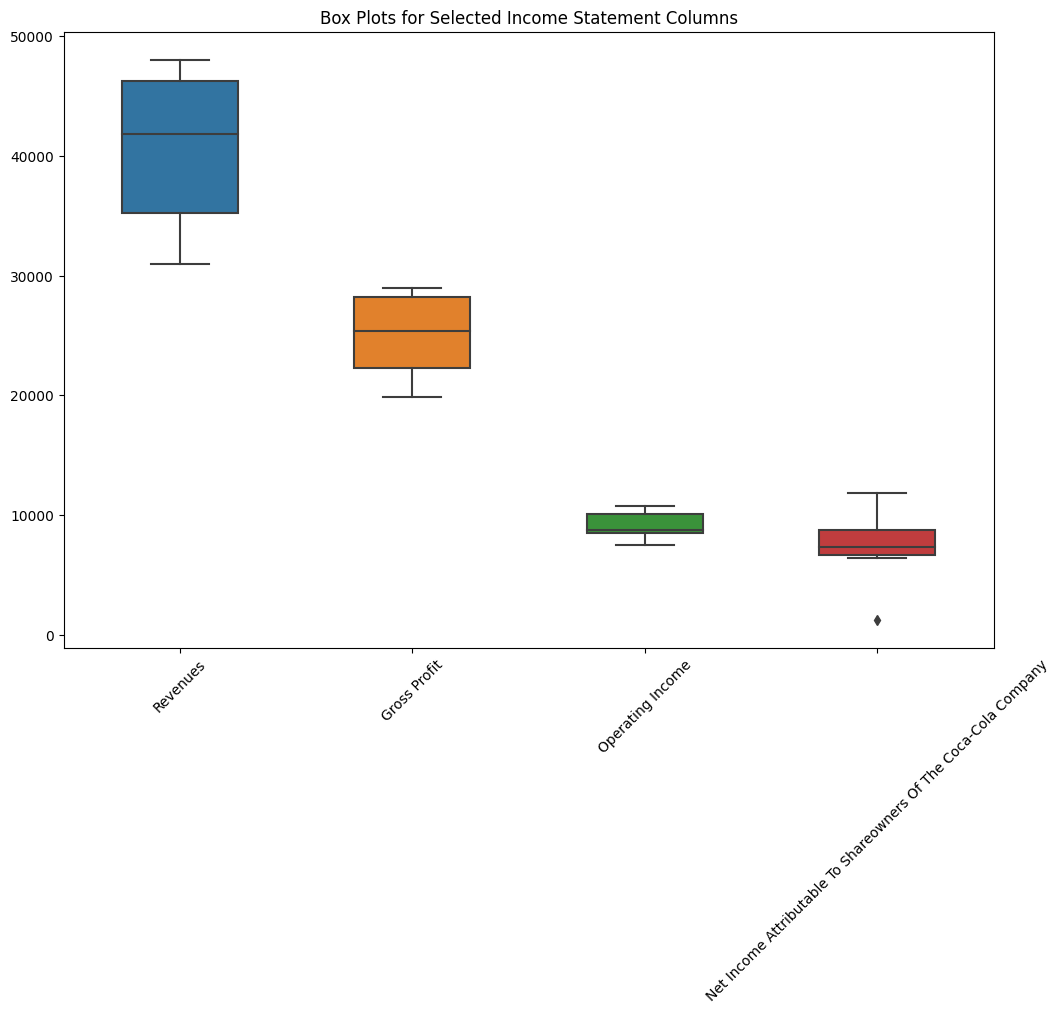

In [20]:
# Create box plots for selected columns in income_statement
selected_columns_income = ['Revenues', 'Gross Profit', 'Operating Income', 'Net Income Attributable To Shareowners Of The Coca-Cola Company']

plt.figure(figsize=(12, 8))
sns.boxplot(data=income_statement[selected_columns_income], width=0.5)
plt.title('Box Plots for Selected Income Statement Columns')
plt.xticks(rotation=45)
plt.show()

The outlier in the Net Income Attributable To Shareowners Of The Coca-Cola Company in 2017, recording 1248, suggests a significant deviation from the typical financial performance observed in other years

<Figure size 1200x800 with 0 Axes>

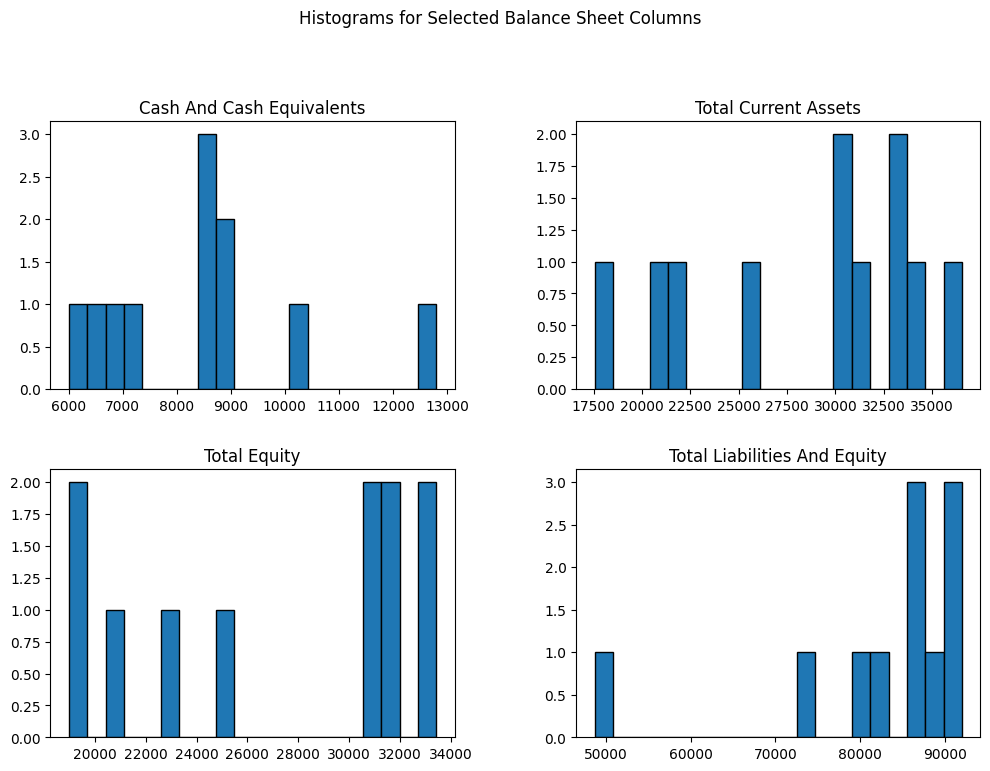

In [21]:
# Create histograms for selected columns in balance_sheet
selected_columns_balance = ['Cash And Cash Equivalents', 'Total Current Assets', 'Total Equity', 'Total Liabilities And Equity']

plt.figure(figsize=(12, 8))
balance_sheet[selected_columns_balance].hist(bins=20, edgecolor='black', grid=False, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Histograms for Selected Balance Sheet Columns', y=1.02)
plt.show()

In [22]:
# Function to calculate and annotate correlation coefficient and p-value
def annotate_correlation_pvalue(x, y, **kwargs):
    r, p = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"Corr: {r:.2f}\nP-value: {p:.4f}", xy=(0.1, 0.9), xycoords=ax.transAxes)

# **Revenue and Profitability Metrics**

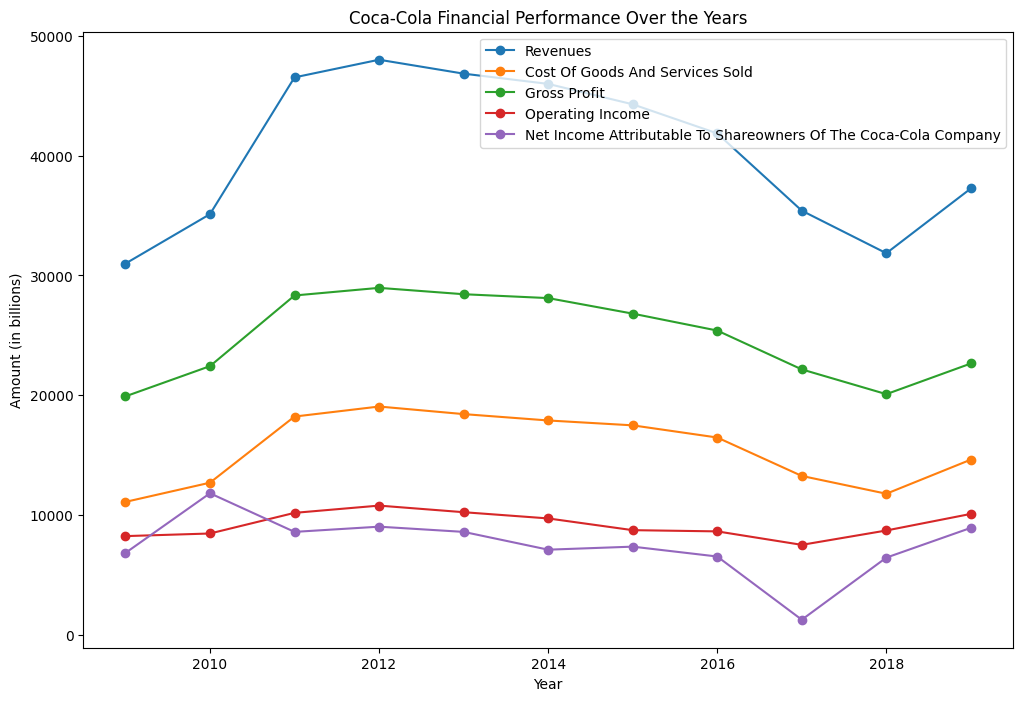

In [23]:
# Plotting Revenues, Gross Profit, Operating Income, and Net Income Over the Years
plt.figure(figsize=(12, 8))
plt.plot(income_statement['Year'], income_statement['Revenues'], marker='o', label='Revenues')
plt.plot(income_statement['Year'], income_statement['Cost Of Goods And Services Sold'], marker='o', label='Cost Of Goods And Services Sold')
plt.plot(income_statement['Year'], income_statement['Gross Profit'], marker='o', label='Gross Profit')
plt.plot(income_statement['Year'], income_statement['Operating Income'], marker='o', label='Operating Income')
plt.plot(income_statement['Year'], income_statement['Net Income Attributable To Shareowners Of The Coca-Cola Company'], marker='o', label='Net Income Attributable To Shareowners Of The Coca-Cola Company')
plt.title('Coca-Cola Financial Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.legend()
plt.grid(False)
plt.show()

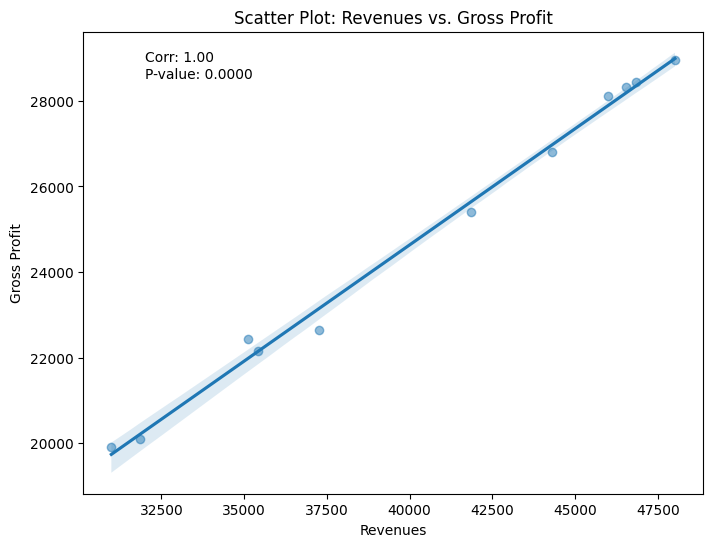

In [24]:
# Select relevant columns for scatter plot
selected_columns = ['Revenues', 'Gross Profit', 'Operating Income', 'Net Income Attributable To Shareowners Of The Coca-Cola Company']
selected_data = income_statement[selected_columns]

# Function to calculate and annotate correlation coefficient and p-value
def annotate_correlation_pvalue(x, y, **kwargs):
    r, p = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"Corr: {r:.2f}\nP-value: {p:.4f}", xy=(0.1, 0.9), xycoords=ax.transAxes)

# Scatter plot for 'Revenues' vs. 'Gross_Profit'
plt.figure(figsize=(8, 6))
sns.regplot(x='Revenues', y='Gross Profit', data=selected_data, scatter_kws={'alpha': 0.5})
annotate_correlation_pvalue(selected_data['Revenues'], selected_data['Gross Profit'])
plt.title('Scatter Plot: Revenues vs. Gross Profit')
plt.show()

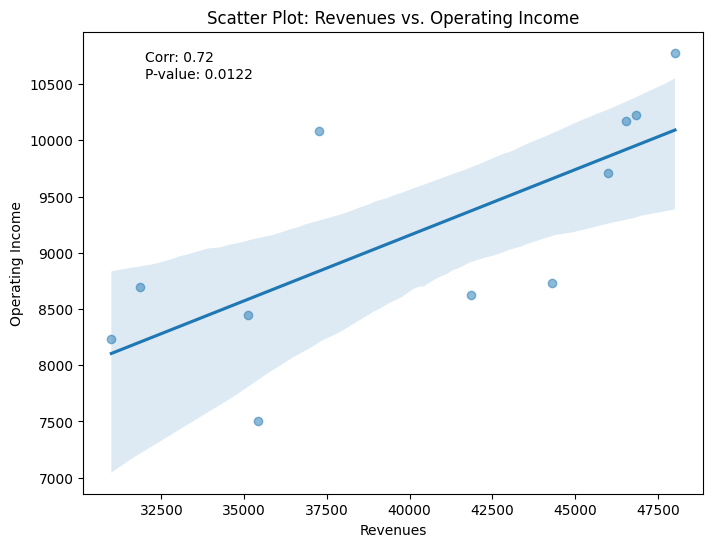

In [25]:
# Scatter plot for 'Revenues' vs. 'Operating_Income'
plt.figure(figsize=(8, 6))
sns.regplot(x='Revenues', y='Operating Income', data=selected_data, scatter_kws={'alpha': 0.5})
annotate_correlation_pvalue(selected_data['Revenues'], selected_data['Operating Income'])
plt.title('Scatter Plot: Revenues vs. Operating Income')
plt.show()

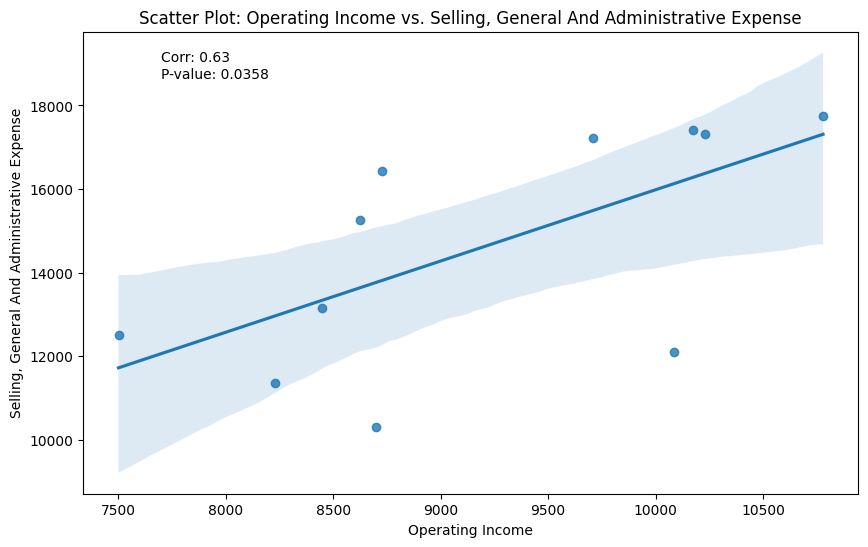

In [26]:
#Scatter Plot: Operating Income vs. Selling, General And Administrative Expense

plt.figure(figsize=(10, 6))
sns.regplot(x='Operating Income', y='Selling, General And Administrative Expense', data=income_statement)
annotate_correlation_pvalue(income_statement['Operating Income'],
                            income_statement['Selling, General And Administrative Expense'])
plt.title('Scatter Plot: Operating Income vs. Selling, General And Administrative Expense')
plt.xlabel('Operating Income')
plt.ylabel('Selling, General And Administrative Expense')
plt.show()


## **Earnings Per Share (EPS)**

In [27]:
#Bar Plot: Basic and Diluted Net Income Per Share Over the Years

fig_eps_grouped = px.bar(income_statement, x='Year',
                         y=['Basic Net Income Per Share (In Dollars Per Share)', 'Diluted Net Income Per Share (In Dollars Per Share)'],
                         title='Basic and Diluted EPS Over the Years',
                         labels={'value': 'EPS (in dollars)', 'Year': 'Year'},
                         color_discrete_sequence=['red', 'blue'],
                         barmode='group')
fig_eps_grouped.show()

## **Net Profit Margin**

In [32]:
#Line Plot: Net Profit Margin Over the Years

# Calculate Net Profit Margin
income_statement['Net Profit Margin'] = (income_statement['Net Income Attributable To Shareowners Of The Coca-Cola Company'] / income_statement['Revenues']) * 100


fig = px.line(income_statement, x='Year', y='Net Profit Margin')
fig.update_layout(xaxis_title='Year', yaxis_title='Value')
fig.show()

<ipython-input-32-7a2851e7a4ae>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Operating Performance Metrics**

In [33]:
# Line Plot: Operating Income and Interest Income Over the Years

fig_operating_performance = px.line(income_statement, x='Year', y=['Operating Income', 'Interest Income'],
                                     title='Operating Income and Interest Income Over the Years',
                                     labels={'value': 'Amount (in billions)', 'Year': 'Year'})
fig_operating_performance.show()

## **Interest and Financing Metrics**

In [34]:
# Line Plot: Interest Income and Interest Expense Over the Years

fig_interest_metrics = px.line(income_statement, x='Year', y=['Interest Income', 'Interest Expense'],
                                title='Interest Income and Interest Expense Over the Years',
                                labels={'value': 'Amount (in billions)', 'Year': 'Year'})
fig_interest_metrics.show()


##**Earnings Distribution Metrics**

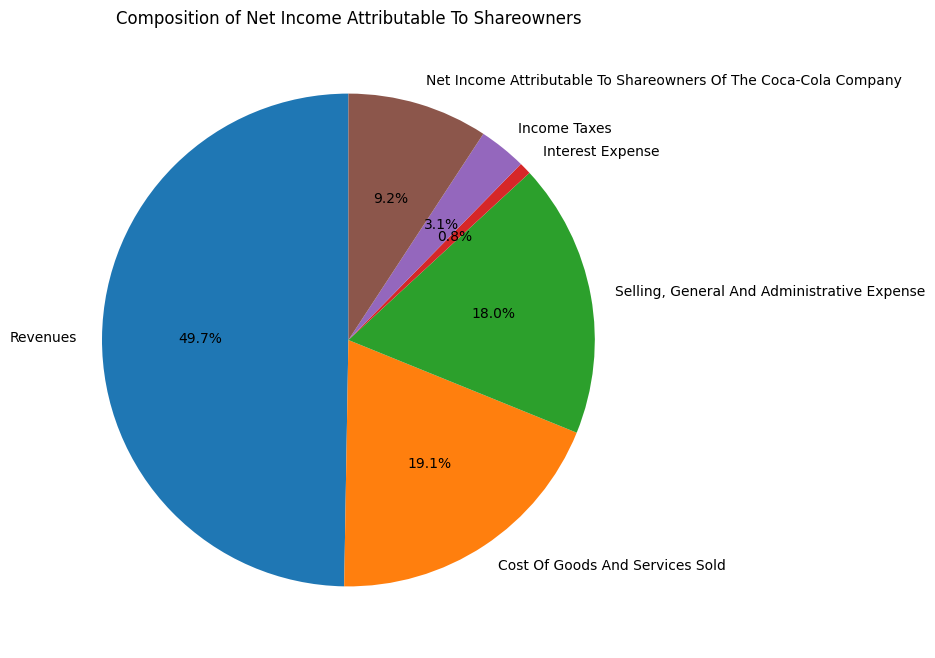

In [35]:
#Pie Chart: Composition of Net Income Attributable To Shareowners

earnings_components = ['Revenues', 'Cost Of Goods And Services Sold', 'Selling, General And Administrative Expense', 'Interest Expense', 'Income Taxes', 'Net Income Attributable To Shareowners Of The Coca-Cola Company']

earnings_data = income_statement[earnings_components].sum()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(earnings_data, labels=earnings_data.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Composition of Net Income Attributable To Shareowners')
plt.show()


## **Tax Metrics**

In [36]:
# Income Taxes Distribution by Year

plt.figure(figsize=(12, 8))

fig_interest_metrics = px.line(income_statement, x='Year', y=['Income Taxes'],
                                title='Income Taxes Over the Years',
                                labels={'value': 'Amount (in billions)', 'Year': 'Year'})
fig_interest_metrics.show()

<Figure size 1200x800 with 0 Axes>

## **Equity and Ownership Metrics**

In [37]:
# Line chart for 'Total Liabilities And Equity' over the years using Plotly
fig_balance_sheet = px.line(balance_sheet, x='Year', y='Total Liabilities And Equity',
                            title='Total Liabilities And Equity Over the Years',
                            labels={'Total Liabilities And Equity': 'Amount (in billions)', 'Year': 'Year'})
fig_balance_sheet.show()

## **Asset Utilization**

In [38]:
#Line Plot: Line Plot: Total Assets Over the Years

fig_total_assets = px.line(balance_sheet, x='Year', y='Total Assets', title='Total Assets Over the Years',
                           labels={'Total Assets': 'Total Assets (in billions)', 'Year': 'Year'})
fig_total_assets.show()


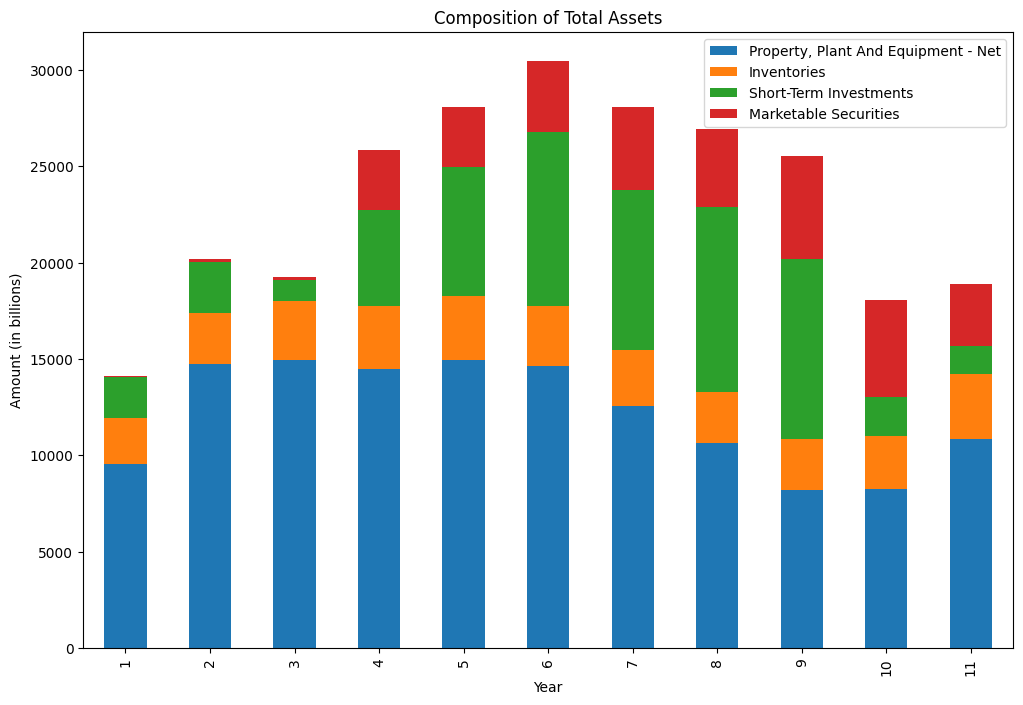

In [39]:
asset_components = [
    'Property, Plant And Equipment - Net', 'Inventories',
    'Short-Term Investments', 'Marketable Securities'
]
asset_data = balance_sheet[asset_components]

fig, ax = plt.subplots(figsize=(12, 8))
asset_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Composition of Total Assets')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.show()